## Logistic Regression

Given the empirical loss (the risk) for logistuc regression: 

$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \mathrm{log}\big(1 + e ^{-y^{(i)} \theta^T x^{(i)}}\big) = - \frac{1}{m} \sum_{i=1}^{m} \mathrm{log}(h_\theta (y^{(i)}x^{(i)}))$

where $ y(i) ∈ \{−1,1\}, h_θ(x) = g(θ^Tx) $ and $ g(z) = 1/(1+e^{−z}) $. Find the Hessian H of this function and show that it is positive semidefinite. 

First, note that:

$\frac{\partial g(z)}{\partial z} \frac{1}{(1+e^{−z})} = \frac{(e^{-z})}{(1+e^{-z})^2} = \frac{(e^{-z})}{(1+e^{-z})} \frac{1}{(1+e^{-z})} = \frac{(e^{-z})}{(1+e^{-z})} g(z) = (\frac{1}{(1+e^{-z})} - \frac{(1+e^{-z})}{(1+e^{-z})}) g(z)
=(g(z) - 1)g(z) $


Therefore,

$ \frac{\partial J(\theta)}{\partial \theta_{i}} = - \frac{1}{m} \sum_{i=1}^{m} \frac{1}{g(z)} \frac{\partial g(z)}{\partial z}(y^{(i)}x^{(i)}) = - \frac{1}{m} \sum_{i=1}^{m} \frac{1}{g(z)} (g(z) - 1)(g(z)) (y^{(i)}x^{(i)}) = - \frac{1}{m} \sum_{i=1}^{m} (g(z) - 1)(y^{(i)}x^{(i)}) $

So, 

$ H_{ij} = - \frac{\partial J(\theta)}{\partial \theta_{i} \theta_{j}} \frac{1}{m} \sum_{k=1}^{m} (g(z) - 1)(y^{(i)}x^{(i)}) = - \frac{1}{m} \sum_{k=1}^{m} (g(z) - 1)g(z)(y^{(k)}x_i^{(k)})(y^{(k)}x_j^{(k)}) $ 

Since, $ y^{(i)} ∈ \{−1,1\} $, 

$ H_{ij} = -\frac{1}{m} \sum_{k=1}^{m} (g(z) - 1)g(z)x_i^{(k)}x_j^{(k)} $

Lastly, 

\begin{align*}
z^{T} Hz = z^{T} (\sum_{i=1}^m \sum_{j=1}^m H_{ij}) z \\
= z^T \sum_{i=1}^m \sum_{j=1}^m ( -\frac{1}{m} \sum_{k=1}^{m} (g(z) - 1)g(z)x_i^{(k)}x_j^{(k)} ) z \\
= \sum_{i=1}^m \sum_{j=1}^m (z_{i}x_{i}x_{j}z_{j}) (-\frac{1}{m} \sum_{k=1}^{m} (g(z) - 1)g(z)) \\
= (x^Tz)^2 (-\frac{1}{m} \sum_{k=1}^{m} (g(z) - 1)g(z)) \\
\end{align*}

since, $ (g(z) - 1)g(z) ∈ [0, 1] $ and $ (x^{T}z)^{2} >= 0 $, $ H $ is positive semidefinite

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

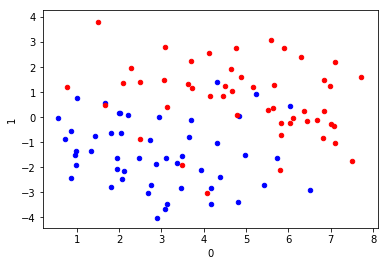

In [4]:
#Loading and Plotting Data:
x_df = pd.read_csv('data/logistic_x.txt',  sep='\ +', header=None, engine='python')
y_df = pd.read_csv('data/logistic_y.txt', sep='\ +', header=None, engine='python')
y_df = y_df.astype(int)

x_df['label'] = y_df[0].values

ax = plt.axes()

x_df.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
x_df.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [5]:
x = x_df[[0, 1]].values
x = np.hstack([np.ones((x.shape[0], 1)), x])
y = x_df['label'].values

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z) )

def gradient_l(theta, x, y):
    z =  y * x.dot(theta)
    nabla = np.mean((sigmoid(z) - 1) * y * x.T, axis=1)
    return nabla

def hessian_l(theta, x, y):
    hess = np.zeros((x.shape[1], x.shape[1]))
    z =  y * x.dot(theta)
    for i in range(hess.shape[0]):
        for j in range(hess.shape[0]):
            if i <= j:
                hess[i][j] = np.mean(sigmoid(z) * (1 - sigmoid(z)) * x[:,i] * x[:,j])             
                if i != j:
                    hess[j][i] = hess[i][j]

    return hess    

In [37]:
def perform_newton(x, y, eps):
    theta = np.zeros(x.shape[1])
    delta = 1
    thetas = []
    n_iter = 0
    while delta > eps:
        prev_theta = theta.copy()
        hess = hessian_l(theta, x, y)
        nabla = gradient_l(theta, x, y)
        theta -= np.linalg.inv(hess).dot(nabla)
        delta = np.linalg.norm(theta-prev_theta, ord=1)
        thetas.append(theta)
        n_iter += 1
        
    return (theta, thetas, n_iter)
        
newton = perform_newton(x, y, 1e-6)
n_iter = newton[2]
theta = newton[0]
print("Converaged on {0} iterations".format(n_iter))

Converaged on 7 iterations


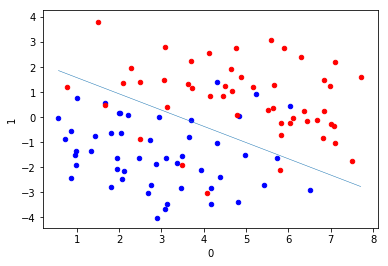

In [38]:
ax = plt.axes()

x_df.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
x_df.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')


x_axis_vals = np.array([np.min(x[:,1]), np.max(x[:,1])])
y_axis_vals = (theta[0] + theta[1] * x_axis_vals) / (- theta[2])
plt.plot(x_axis_vals, y_axis_vals, lw=0.5)
